Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


## Multi linear regression (50_startups)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn import metrics
%matplotlib inline

In [2]:
# read data
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Exploratory Data Analysis and Visualization of dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
# rename column for easy use
data=data.rename({'R&D Spend':'RDS','Administration':'AD','Marketing Spend':'MS'},axis=1)
data.head()

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.nunique()

RDS       49
AD        50
MS        48
State      3
Profit    50
dtype: int64

In [6]:
data.isna().sum()

RDS       0
AD        0
MS        0
State     0
Profit    0
dtype: int64

In [7]:
# checking for duplicate
data[data.duplicated()]


,RDS,AD,MS,State,Profit


<AxesSubplot:xlabel='State', ylabel='Profit'>

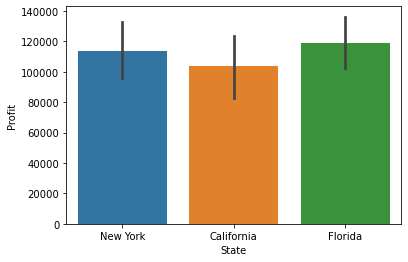

In [8]:
# Profit split in State level
sns.barplot(x='State',y='Profit',data=data)

In [9]:
# Converting categorical variable into integer values by dummy variables
data1=data.copy()
data1=pd.get_dummies(data,columns=['State'])
data1.head()

,RDS,AD,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [10]:
data1=data1.rename({'State_California':'S_C','State_Florida':'S_F','State_New York':'S_Y'},axis=1)
data1.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
data1.describe()

,RDS,AD,MS,Profit,S_C,S_F,S_Y
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [12]:
# correlation 
data1.corr()

,RDS,AD,MS,Profit,S_C,S_F,S_Y
RDS,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
AD,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
S_C,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
S_F,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
S_Y,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


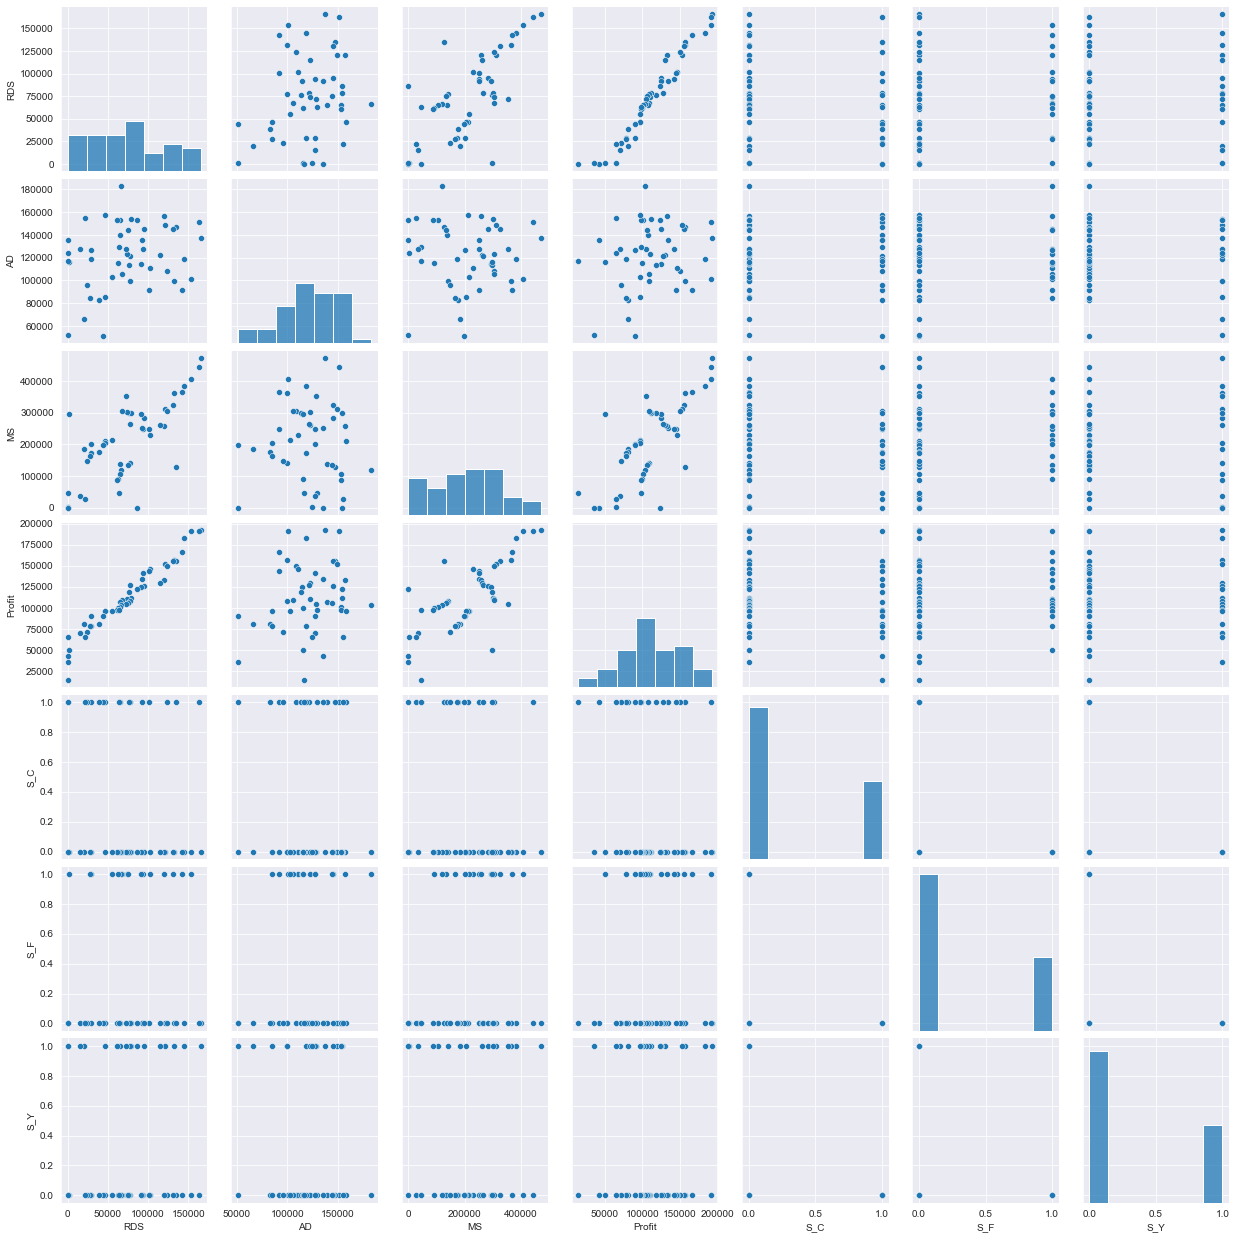

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [14]:
#model building
model=smf.ols('Profit~RDS+AD+MS+S_C+S_F+S_Y',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.34e-27
Time:                        11:42:26   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RDS            0.8060      0.046     17.369      0.000       0.712       0.900
AD            -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS             0.0270      0.017      1.574      0.123      -0.008       0.062
S_C         1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
S_F         1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
S_Y         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
# slr and mlr for in-significant variable "AD" and "MS"
slr_a=smf.ols('Profit~AD',data=data1).fit()
slr_a.tvalues,slr_a.pvalues,slr_a.rsquared

(Intercept    3.040044
 AD           1.419493
 dtype: float64,
 Intercept    0.003824
 AD           0.162217
 dtype: float64,
 0.04028714077757245)

In [16]:
# AD has in-significant pvalue

In [17]:
slr_m=smf.ols('Profit~MS', data=data1).fit()
slr_m.tvalues,slr_m.pvalues,slr_m.rsquared

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64,
 0.5591535746115515)

In [18]:
# MS has significant p values

In [19]:
mlr=smf.ols('Profit~AD+MS',data=data1).fit()
mlr.tvalues,mlr.pvalues

(Intercept    1.142741
 AD           2.467779
 MS           8.281039
 dtype: float64,
 Intercept    2.589341e-01
 AD           1.729198e-02
 MS           9.727245e-11
 dtype: float64)

## model validation 
### checking collinearity in features

In [20]:
# calculating VIF(checking collinearity)
rsq_r=smf.ols("RDS~AD+MS+S_C+S_F+S_Y",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols("AD~RDS+MS+S_C+S_F+S_Y",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols("MS~RDS+AD+S_C+S_F+S_Y",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)
rsq_sc=smf.ols("S_C~RDS+AD+MS+S_F+S_Y",data=data1).fit().rsquared
vif_sc=1/(1-rsq_r)
rsq_sf=smf.ols("S_F~RDS+AD+MS+S_C+S_Y",data=data1).fit().rsquared
vif_sf=1/(1-rsq_r)
rsq_sy=smf.ols("S_Y~RDS+AD+MS+S_C+S_F",data=data1).fit().rsquared
vif_sy=1/(1-rsq_r)

d1={'Variable':['RDS','AD','MS','S_C','S_F','S_Y'],'vif':[vif_r,vif_a,vif_m,vif_sc,vif_sf,vif_sy]}
vif_df=pd.DataFrame(d1)
vif_df

,Variable,vif
0,RDS,2.495511
1,AD,1.177766
2,MS,2.416797
3,S_C,2.495511
4,S_F,2.495511
5,S_Y,2.495511


In [21]:
# No Collinearity, so consider all varaibles in Regression equation

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


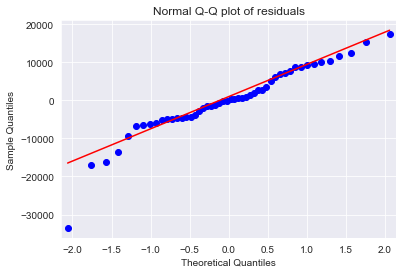

In [22]:
# Residual Analysis
# Checking normality of the residuals with Q-Q plot
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
 # outliar detection from above QQ plot of residuals
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [24]:
# Test for Homoscedasticity
# Defining function to calculate Standardized values(Z_score) of model's fitted values and residual values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

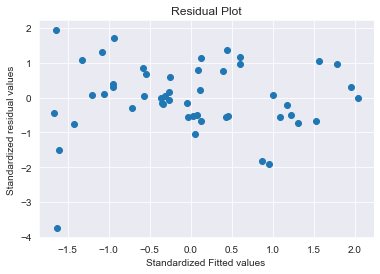

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

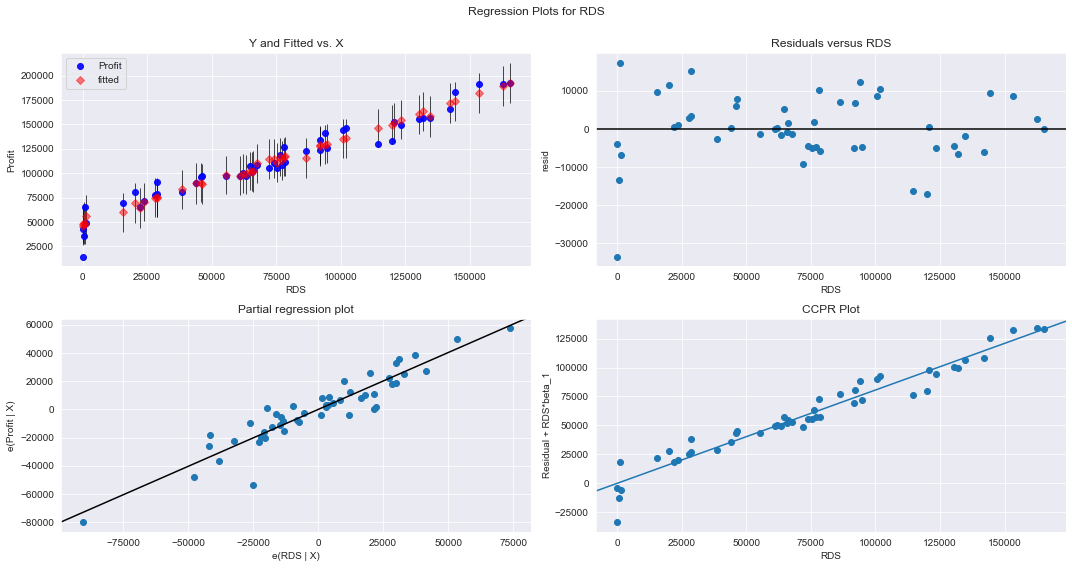

In [26]:
# Residuals Vs Regressors
# checking how variables are corresponding to error
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

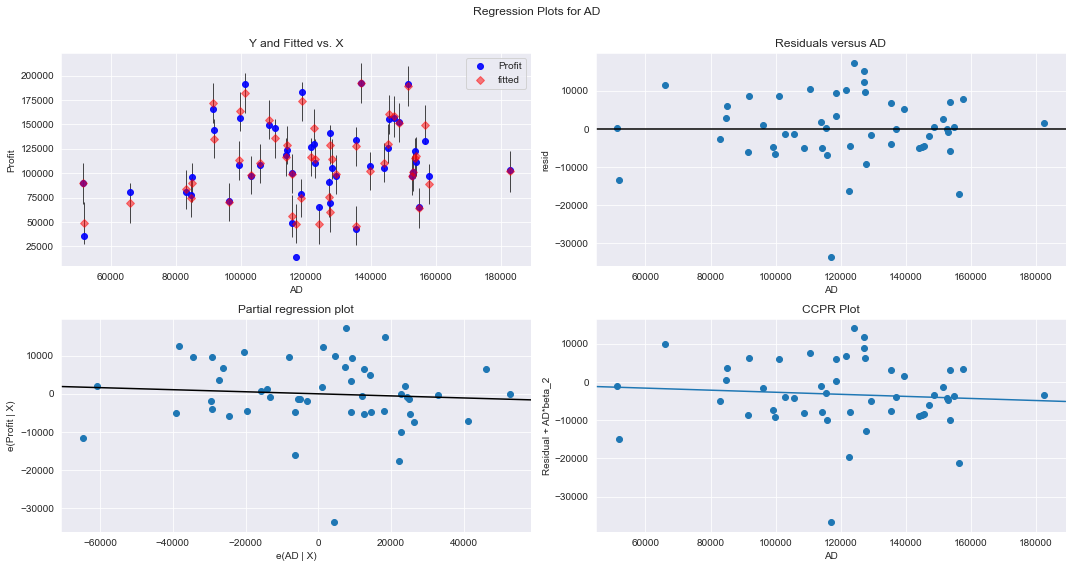

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

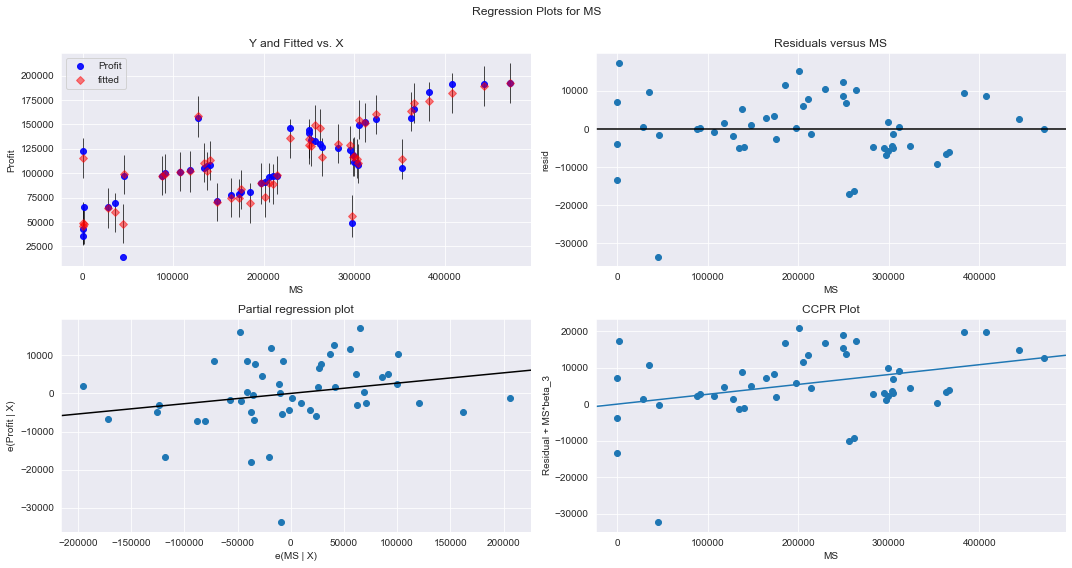

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

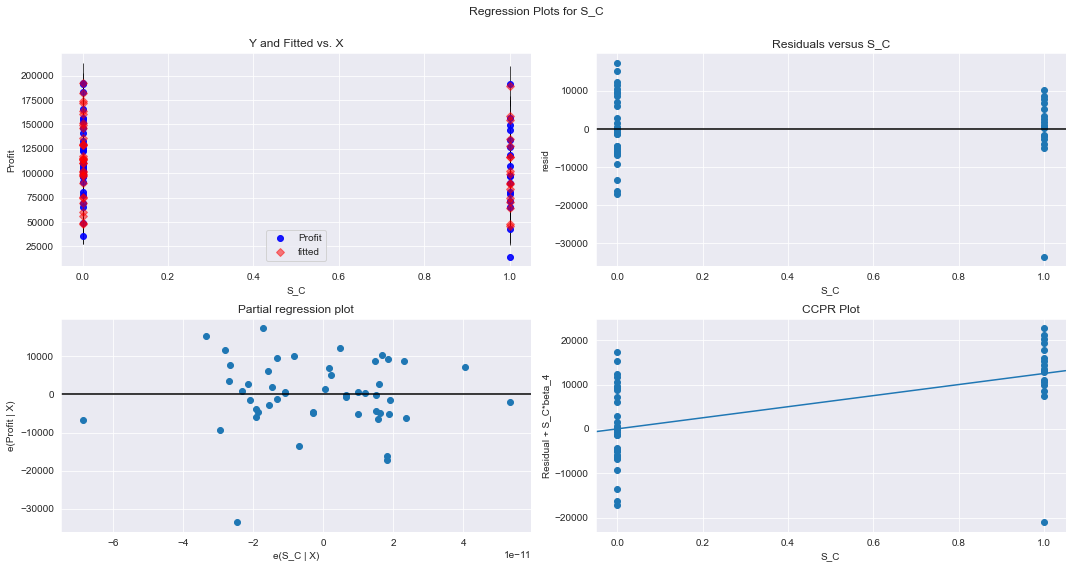

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'S_C',fig=fig)
plt.show()

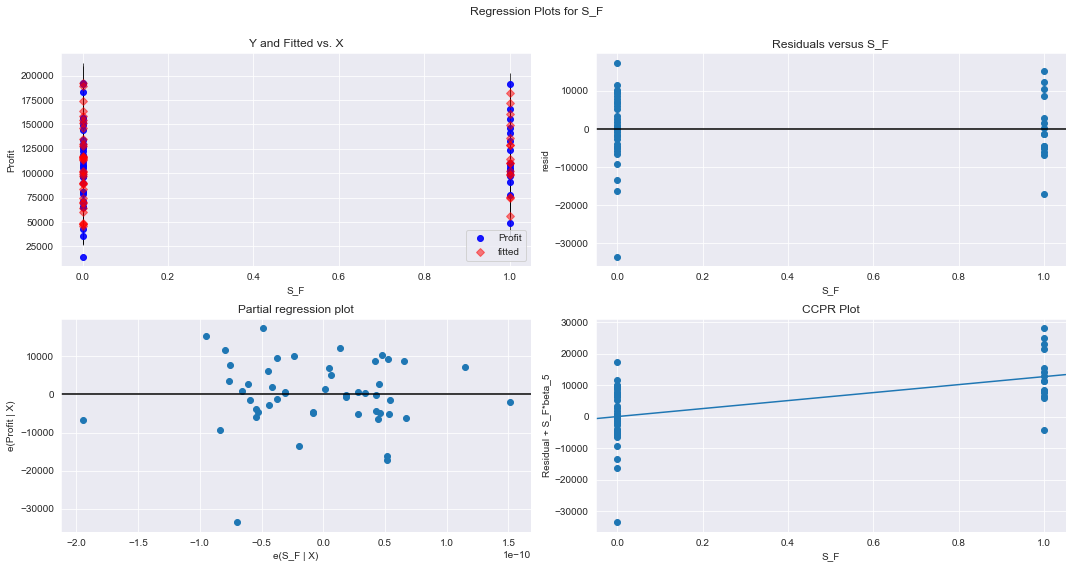

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'S_F',fig=fig)
plt.show()

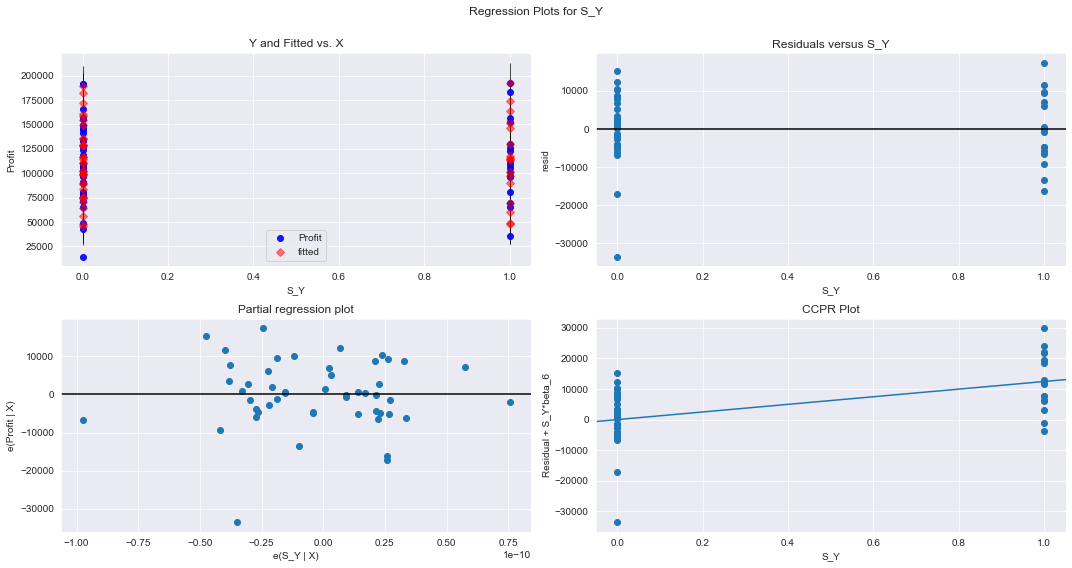

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'S_Y',fig=fig)
plt.show()

In [32]:
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([6.58235386e-06, 3.39430615e-03, 2.39098625e-02, 2.02032949e-02,
       1.20198420e-02, 1.00370545e-02, 2.13697865e-03, 3.57036535e-03,
       6.25257579e-05, 5.41213370e-03, 1.89764313e-02, 1.65867572e-02,
       1.82797330e-02, 6.34364572e-03, 6.17285106e-02, 3.72134923e-02,
       1.35078103e-02, 3.71193311e-03, 2.94854637e-03, 2.81922632e-02,
       6.02783698e-04, 1.00287995e-02, 3.02178458e-03, 3.16115938e-04,
       4.34597714e-03, 3.56884817e-03, 4.96640589e-03, 2.78597505e-02,
       9.20897921e-04, 9.83021753e-05, 2.28936702e-05, 3.65145588e-06,
       5.61582965e-04, 2.31043413e-04, 1.79909587e-02, 7.13289876e-03,
       5.07832731e-02, 6.16526092e-05, 4.78300794e-02, 1.37854568e-03,
       1.94676476e-03, 1.88154422e-03, 1.42427115e-04, 2.00561912e-02,
       1.00026060e-04, 8.09098154e-02, 3.62771434e-02, 3.84131479e-03,
       1.34036686e-01, 2.26250945e-01])

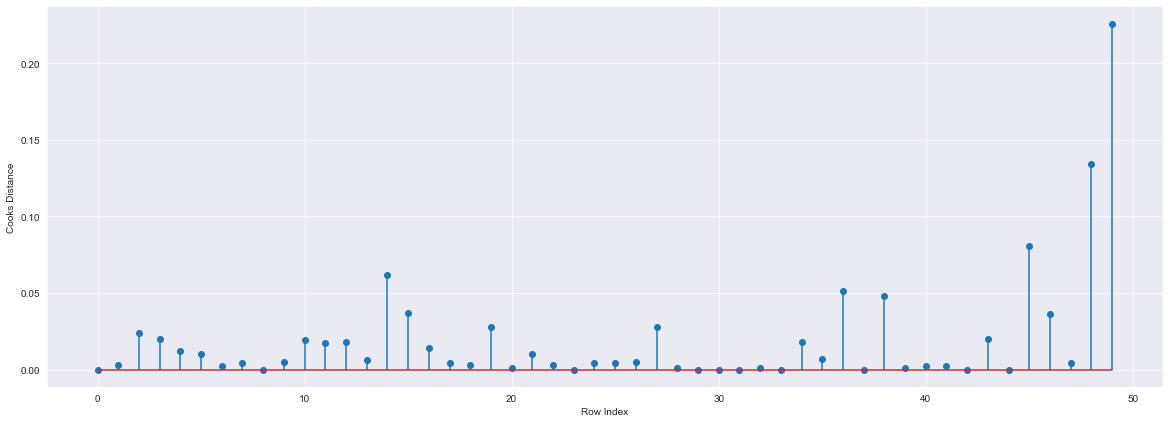

In [33]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
#index and value of influencer where C>0.5
(np.argmax(c),np.max(c))

(49, 0.22625094501509285)

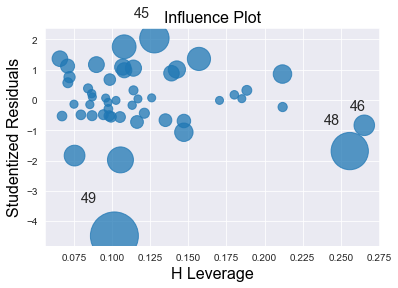

In [35]:
# 2. Leverage Value 
influence_plot(model)
plt.show()

In [36]:
# Leverage Cuttoff Value
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [37]:
data1[data1.index.isin([49])]

,RDS,AD,MS,Profit,S_C,S_F,S_Y
49,0.0,116983.8,45173.06,14681.4,1,0,0


## Improve Model

In [38]:
# Creating a copy of data so that original dataset is not affected
new_data=data1.copy()
new_data.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [39]:
new_data=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
new_data.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [40]:
new_data.shape

(49, 7)

In [41]:
# removing that row which contain zero values
new_data=pd.DataFrame.copy(data1)
new_data= new_data.loc[new_data['RDS'] * new_data['AD']*new_data['MS'] != 0]
new_data.shape

(46, 7)

## using loop for Model Deletion Diagnostic

In [42]:
while np.max(c)>0.5:
    model=smf.ols('Profit~RDS+AD+MS+S_C+S_F+S_Y',data=new_data).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    new_data=new_data.drop(new_data.index[np.argmax(c)],axis=0).reset_index(drop=True)
    new_data
else:
    model1=smf.ols('Profit~RDS+AD+MS+S_C+S_F+S_Y',data=new_data).fit()
    model1.rsquared 
    print("Thus model accuracy is improved to",model1.rsquared)
     

Thus model accuracy is improved to 0.9612981868944914


In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     198.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.96e-27
Time:                        11:42:39   Log-Likelihood:                -472.52
No. Observations:                  46   AIC:                             957.0
Df Residuals:                      40   BIC:                             968.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.399e+04   4594.223      9.576      0.000    3.47e+04    5.33e+04
RDS            0.7751      0.039     19.828      0.000       0.696       0.854
AD            -0.0576      0.045     -1.275      0.210      -0.149       0.034
MS             0.0210      0.015      1.376      0.176      -0.010       0.052
S_C         1.578e+04   2065.707      7.639      0.000    1.16e+04       2e+04
S_F         1.403e+04   2262.512      6.200      0.000    9455.547    1.86e+04
S_Y         1.418e+04   2268.899      6.251      0.000    9597.845    1.88e+04
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.597
Skew:                           0.173   Prob(JB):                        0.742
Kurtosis:                       2.562   Cond. No.                     5.85e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


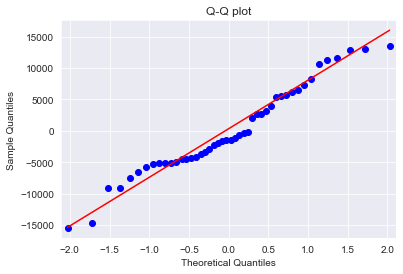

In [44]:
#residual analysis
sm.qqplot(model1.resid,line='q')
plt.title("Q-Q plot")
plt.show()

In [45]:
# prediction of price
predict=model1.predict(new_data)
pred_y=pd.DataFrame({'Actual Price':new_data.Profit,'Predicted Price':predict})
pred_y.head()

,Actual Price,Predicted Price
0,192261.83,188366.866395
1,191792.06,186411.437727
2,191050.39,179699.078207
3,182901.99,171295.829672
4,166187.94,170598.029762


In [46]:
#error calculation
print("Mean Absolute Error:", metrics.mean_absolute_error(new_data.Profit,predict))
print("Mean Squared Error:", metrics.mean_squared_error(new_data.Profit,predict))  
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(new_data.Profit,predict)))

Mean Absolute Error: 5760.003384198285
Mean Squared Error: 48958201.50614591
Root Mean Squared Error: 6997.013756321043


## Model Building with log transformation

In [47]:
data2=pd.DataFrame.copy(new_data)
data2['log_rds']=np.log(new_data.RDS)
data2['log_ad']=np.log(new_data.AD)
data2['log_ms']=np.log(new_data.MS)
data2.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y,log_rds,log_ad,log_ms
0,165349.20,136897.80,471784.10,192261.83,0,0,1,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,1,0,0,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,0,1,0,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,0,0,1,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,0,1,0,11.864338,11.422911,12.810849


In [48]:
log_model=smf.ols('Profit~log_rds+log_ad+log_ms+S_C+S_F+S_Y',data=data2).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     13.29
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.20e-07
Time:                        11:42:40   Log-Likelihood:                -524.80
No. Observations:                  46   AIC:                             1062.
Df Residuals:                      40   BIC:                             1073.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.38e+05   1.39e+05     -1.708      0.095    -5.2e+05    4.36e+04
log_rds     2.408e+04   4712.086      5.110      0.000    1.46e+04    3.36e+04
log_ad      9592.5060   1.51e+04      0.635      0.529    -2.1e+04    4.01e+04
log_ms      4789.2894   5346.679      0.896      0.376   -6016.752    1.56e+04
S_C        -8.318e+04   4.61e+04     -1.803      0.079   -1.76e+05    1.01e+04
S_F        -7.932e+04   4.73e+04     -1.676      0.102   -1.75e+05    1.63e+04
S_Y        -7.553e+04   4.67e+04     -1.618      0.114    -1.7e+05    1.88e+04
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   0.502
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.785
Skew:                           1.114   Prob(JB):                      0.00750
Kurtosis:                       3.370   Cond. No.                     1.47e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


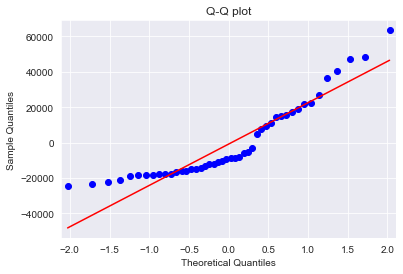

In [49]:
#residual analysis
sm.qqplot(log_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

##  Modeal building with square root transformation 

In [50]:
data3=pd.DataFrame.copy(new_data)
data3['sqrt_rds']=np.sqrt(new_data.RDS)
data3['sqrt_ad']=np.sqrt(new_data.AD)
data3['sqrt_ms']=np.sqrt(new_data.MS)
data3.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y,sqrt_rds,sqrt_ad,sqrt_ms
0,165349.20,136897.80,471784.10,192261.83,0,0,1,406.631529,369.997027,686.865416
1,162597.70,151377.59,443898.53,191792.06,1,0,0,403.234051,389.072731,666.257105
2,153441.51,101145.55,407934.54,191050.39,0,1,0,391.716109,318.033882,638.697534
3,144372.41,118671.85,383199.62,182901.99,0,0,1,379.963696,344.487808,619.031195
4,142107.34,91391.77,366168.42,166187.94,0,1,0,376.971272,302.310718,605.118517


In [51]:
sqrt_model=smf.ols('Profit~sqrt_rds+sqrt_ad+sqrt_ms+S_C+S_F+S_Y',data=data3).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     65.30
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.59e-18
Time:                        11:42:40   Log-Likelihood:                -496.37
No. Observations:                  46   AIC:                             1005.
Df Residuals:                      40   BIC:                             1016.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.186e+04   1.43e+04      0.827      0.413   -1.71e+04    4.08e+04
sqrt_rds     348.2246     30.176     11.540      0.000     287.236     409.213
sqrt_ad      -15.7206     51.103     -0.308      0.760    -119.004      87.562
sqrt_ms       31.2138     19.865      1.571      0.124      -8.935      71.362
S_C         3450.3350   5165.279      0.668      0.508   -6989.082    1.39e+04
S_F         2996.9715   5698.512      0.526      0.602   -8520.150    1.45e+04
S_Y         5408.0027   5537.405      0.977      0.335   -5783.511    1.66e+04
==============================================================================
Omnibus:                       13.704   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.863
Skew:                           1.141   Prob(JB):                     0.000592
Kurtosis:                       4.595   Cond. No.                     5.24e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  7e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


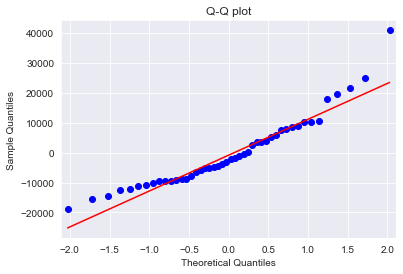

In [52]:
#residual analysis
sm.qqplot(sqrt_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

## Modeal Building with reciprocal transformation

In [53]:
data4=pd.DataFrame.copy(new_data)
data4['r_rds']=np.reciprocal(new_data.RDS)
data4['r_ad']=np.reciprocal(new_data.AD)
data4['r_ms']=np.reciprocal(new_data.MS)
data4.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y,r_rds,r_ad,r_ms
0,165349.20,136897.80,471784.10,192261.83,0,0,1,0.000006,0.000007,0.000002
1,162597.70,151377.59,443898.53,191792.06,1,0,0,0.000006,0.000007,0.000002
2,153441.51,101145.55,407934.54,191050.39,0,1,0,0.000007,0.000010,0.000002
3,144372.41,118671.85,383199.62,182901.99,0,0,1,0.000007,0.000008,0.000003
4,142107.34,91391.77,366168.42,166187.94,0,1,0,0.000007,0.000011,0.000003


In [54]:
r_model=smf.ols('Profit~r_rds+r_ad+r_ms+S_C+S_F+S_Y',data=data4).fit()
r_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.137
Date:                Tue, 14 Jun 2022   Prob (F-statistic):             0.0807
Time:                        11:42:41   Log-Likelihood:                -541.87
No. Observations:                  46   AIC:                             1096.
Df Residuals:                      40   BIC:                             1107.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.072e+05   1.39e+04      7.737      0.000    7.92e+04    1.35e+05
r_rds      -1.055e+08   4.66e+07     -2.264      0.029      -2e+08   -1.13e+07
r_ad       -2.445e+09   2.03e+09     -1.202      0.237   -6.56e+09    1.67e+09
r_ms        6.732e+07   1.11e+08      0.608      0.547   -1.57e+08    2.91e+08
S_C         3.045e+04   8917.726      3.415      0.001    1.24e+04    4.85e+04
S_F         3.861e+04   8288.844      4.659      0.000    2.19e+04    5.54e+04
S_Y         3.809e+04   8562.435      4.449      0.000    2.08e+04    5.54e+04
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.091
Skew:                           0.600   Prob(JB):                        0.213
Kurtosis:                       2.583   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.24e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


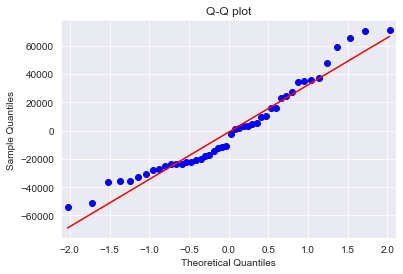

In [55]:
#residual analysis
sm.qqplot(r_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

## Modeal Building with square transformation

In [56]:
data5=pd.DataFrame.copy(new_data)
data5['s_rds']=(new_data.RDS)**2
data5['s_ad']=(new_data.AD)**2
data5['s_ms']=(new_data.MS)**2
data5.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y,s_rds,s_ad,s_ms
0,165349.20,136897.80,471784.10,192261.83,0,0,1,2.734036e+10,1.874101e+10,2.225802e+11
1,162597.70,151377.59,443898.53,191792.06,1,0,0,2.643801e+10,2.291517e+10,1.970459e+11
2,153441.51,101145.55,407934.54,191050.39,0,1,0,2.354430e+10,1.023042e+10,1.664106e+11
3,144372.41,118671.85,383199.62,182901.99,0,0,1,2.084339e+10,1.408301e+10,1.468419e+11
4,142107.34,91391.77,366168.42,166187.94,0,1,0,2.019450e+10,8.352456e+09,1.340793e+11


In [57]:
s_model=smf.ols('Profit~s_rds+s_ad+s_ms+S_C+S_F+S_Y',data=data5).fit()
s_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     91.76
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           7.91e-21
Time:                        11:42:42   Log-Likelihood:                -489.28
No. Observations:                  46   AIC:                             990.6
Df Residuals:                      40   BIC:                             1002.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.148e+04   3652.450     16.832      0.000    5.41e+04    6.89e+04
s_rds       4.622e-06    3.7e-07     12.500      0.000    3.87e-06    5.37e-06
s_ad       -1.115e-07   2.64e-07     -0.423      0.675   -6.44e-07    4.21e-07
s_ms       -1.772e-09   5.27e-08     -0.034      0.973   -1.08e-07    1.05e-07
S_C         2.162e+04   2480.835      8.713      0.000    1.66e+04    2.66e+04
S_F          2.12e+04   2560.476      8.281      0.000     1.6e+04    2.64e+04
S_Y         1.866e+04   2697.857      6.916      0.000    1.32e+04    2.41e+04
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.436
Skew:                          -0.467   Prob(JB):                        0.296
Kurtosis:                       3.632   Cond. No.                     1.11e+27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.66e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


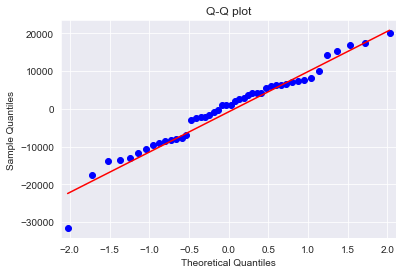

In [58]:
#residual analysis
sm.qqplot(s_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

## Modeal Building with cube root transformation

In [59]:
data6=pd.DataFrame.copy(new_data)
data6['qrt_rds']=np.cbrt(new_data.RDS)
data6['qrt_ad']=np.cbrt(new_data.AD)
data6['qrt_ms']=np.cbrt(new_data.MS)
data6.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y,qrt_rds,qrt_ad,qrt_ms
0,165349.20,136897.80,471784.10,192261.83,0,0,1,54.886731,51.538545,77.848055
1,162597.70,151377.59,443898.53,191792.06,1,0,0,54.580578,53.295089,76.283024
2,153441.51,101145.55,407934.54,191050.39,0,1,0,53.536210,46.592455,74.164629
3,144372.41,118671.85,383199.62,182901.99,0,0,1,52.459974,49.141594,72.634289
4,142107.34,91391.77,366168.42,166187.94,0,1,0,52.184177,45.043870,71.541871


In [60]:
cbrt_model=smf.ols('Profit~qrt_rds+qrt_ad+qrt_ms+S_C+S_F+S_Y',data=data6).fit()
cbrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     38.66
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           2.71e-14
Time:                        11:42:42   Log-Likelihood:                -506.75
No. Observations:                  46   AIC:                             1026.
Df Residuals:                      40   BIC:                             1036.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.874e+04   2.61e+04     -0.718      0.477   -7.15e+04     3.4e+04
qrt_rds     2902.6947    328.086      8.847      0.000    2239.608    3565.781
qrt_ad        47.3611    660.909      0.072      0.943   -1288.387    1383.109
qrt_ms       370.7533    258.887      1.432      0.160    -152.478     893.984
S_C        -7732.3217   8908.333     -0.868      0.391   -2.57e+04    1.03e+04
S_F        -7090.1629   9655.651     -0.734      0.467   -2.66e+04    1.24e+04
S_Y        -3919.9713   9363.778     -0.419      0.678   -2.28e+04     1.5e+04
==============================================================================
Omnibus:                       16.224   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.942
Skew:                           1.299   Prob(JB):                     7.71e-05
Kurtosis:                       4.770   Cond. No.                     1.51e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


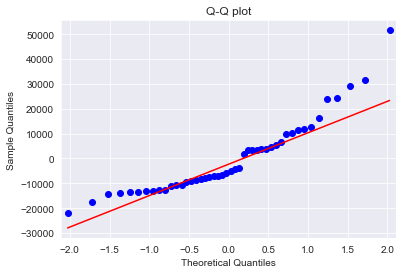

In [61]:
#residual analysis
sm.qqplot(cbrt_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

## Modeal Building with box cox transformation 

In [62]:
data7=pd.DataFrame.copy(new_data)
data7.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [63]:
from scipy import stats

In [64]:
data7['R'],lamda_r=stats.boxcox(data7['RDS'])
data7['A'],lamda_a=stats.boxcox(data7['AD'])
data7['M'],lamda_m=stats.boxcox(data7['MS'])

In [65]:
data7.head()

,RDS,AD,MS,Profit,S_C,S_F,S_Y,R,A,M
0,165349.20,136897.80,471784.10,192261.83,0,0,1,6894.581072,1.459275e+07,71571.861890
1,162597.70,151377.59,443898.53,191792.06,1,0,0,6813.286036,1.684020e+07,67990.580664
2,153441.51,101145.55,407934.54,191050.39,0,1,0,6539.795929,9.481122e+06,63318.816632
3,144372.41,118671.85,383199.62,182901.99,0,0,1,6264.144999,1.190518e+07,60068.181977
4,142107.34,91391.77,366168.42,166187.94,0,1,0,6194.515124,8.205708e+06,57810.795844


In [66]:
Box_model=smf.ols('Profit~R+A+M+S_C+S_F+S_Y',data=data7).fit()
Box_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           4.60e-23
Time:                        11:42:43   Log-Likelihood:                -483.32
No. Observations:                  46   AIC:                             978.6
Df Residuals:                      40   BIC:                             989.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.83e+04   4699.561      6.022      0.000    1.88e+04    3.78e+04
R             19.0621      1.232     15.474      0.000      16.572      21.552
A             -0.0003      0.000     -0.841      0.405      -0.001       0.000
M              0.2410      0.127      1.899      0.065      -0.016       0.498
S_C         9960.1716   2390.318      4.167      0.000    5129.159    1.48e+04
S_F         8473.1847   2619.582      3.235      0.002    3178.812    1.38e+04
S_Y         9865.2645   2604.682      3.788      0.001    4601.006    1.51e+04
==============================================================================
Omnibus:                        5.632   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.467
Skew:                           0.712   Prob(JB):                        0.107
Kurtosis:                       3.551   Cond. No.                     8.75e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\hmaca\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


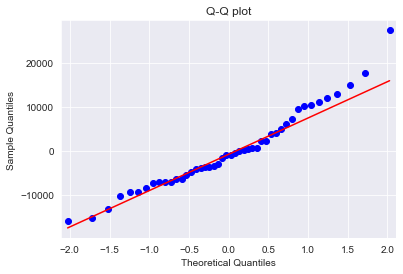

In [67]:
#residual analysis
sm.qqplot(Box_model.resid,line='q')
plt.title("Q-Q plot")
plt.show()

## Table that contain Rsquared values for Models

In [68]:
model_data={'Prep_Models':['First_model','improve_model','log_Model','square_root_model','reciprocal_model','Square_model','cube_root_model','Boxcox_model'],'Rsquared':[model.rsquared,model1.rsquared,log_model.rsquared,sqrt_model.rsquared,r_model.rsquared,s_model.rsquared,cbrt_model.rsquared,Box_model.rsquared]}
R_value=pd.DataFrame(model_data)
R_value

,Prep_Models,Rsquared
0,First_model,0.950752
1,improve_model,0.961298
2,log_Model,0.624213
3,square_root_model,0.890860
4,reciprocal_model,0.210842
5,Square_model,0.919806
6,cube_root_model,0.828561
7,Boxcox_model,0.938095


## Improve model have higest Rsquared value ,Hence this model gives best profit prediction

## Prediction for new data

In [69]:
# new data for prediction
#profit prediction for NewYork 
pred_data=pd.DataFrame({'RDS':120000,"AD":140000,"MS":320000,'S_C':0,'S_F':0,'S_Y':1},index=[0])
pred_data

,RDS,AD,MS,S_C,S_F,S_Y
0,120000,140000,320000,0,0,1


In [70]:
model1.predict(pred_data)

0    149848.721929
dtype: float64

In [71]:
#Profit prediction for Florida
pred_data1=pd.DataFrame({'RDS':120000,"AD":140000,"MS":320000,'S_C':0,'S_F':1,'S_Y':0},index=[0])
pred_data1

,RDS,AD,MS,S_C,S_F,S_Y
0,120000,140000,320000,0,1,0


In [72]:
model1.predict(pred_data1)

0    149693.516929
dtype: float64

In [73]:
# Profit prediction for California
pred_data3=pd.DataFrame({'RDS':120000,"AD":140000,"MS":320000,'S_C':1,'S_F':0,'S_Y':0},index=[0])
pred_data3

,RDS,AD,MS,S_C,S_F,S_Y
0,120000,140000,320000,1,0,0


In [74]:
model1.predict(pred_data3)

0    151445.951298
dtype: float64